In [624]:
!git add COVID_dataset.ipynb
!git commit -m "updates"
!git push origin main

The file will have its original line endings in your working directory


[main 96717de] updates
 1 file changed, 630 insertions(+), 159 deletions(-)


To https://github.com/ahwali/gradproject.git
   76de043..96717de  main -> main


In [310]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [84]:
df_ins = pd.read_csv('nchs_covid_health_insurance_coverage.csv')
df_access = pd.read_csv('nchs_covid_reduced_access_to_health_care.csv')

In [88]:
df_access.columns.values

array(['Indicator', 'Group', 'State', 'Subgroup', 'Phase', 'Time Period',
       'Time Period Label', 'Time Period Start Date',
       'Time Period End Date', 'Value', 'Low CI', 'High CI',
       'Confidence Interval', 'Quartile Range'], dtype=object)

In [106]:
df_access['Indicator'].unique()

array(['Delayed Medical Care, Last 4 Weeks',
       'Did Not Get Needed Care, Last 4 Weeks',
       'Delayed or Did Not Get Care, Last 4 Weeks'], dtype=object)

In [142]:
df_access = df_access.dropna(subset=['Value'])
df_access['Value'].isna().any()

False

In [143]:
df_access['Phase'].unique()

array(['1', '2', '3 (Oct 28 � Dec 21)', '3 (Jan 6 � Mar 29)', '3.1'],
      dtype=object)

In [144]:
df_access_Delayed = df_access[df_access['Indicator']=='Delayed Medical Care, Last 4 Weeks']
df_access_Didnot = df_access[df_access['Indicator']=='Did Not Get Needed Care, Last 4 Weeks']
df_access_Delayed_Didnot = df_access[df_access['Indicator']=='Delayed or Did Not Get Care, Last 4 Weeks']

In [420]:
df_access_Delayed['Phase_adj'] = df_access_Delayed['Phase'].str.replace("3\s\(Oct 28.*", '3.02', regex=True).str.replace("3\s\(Jan 6.*", '3.05', regex=True)
df_access_Didnot['Phase_adj'] = df_access_Didnot['Phase'].str.replace("3\s\(Oct 28.*", '3.02', regex=True).str.replace("3\s\(Jan 6.*", '3.05', regex=True)
df_access_Delayed_Didnot['Phase_adj'] = df_access_Delayed_Didnot['Phase'].str.replace("3\s\(Oct 28.*", '3.02', regex=True).str.replace("3\s\(Jan 6.*", '3.05', regex=True)

C:\Users\ahwal\AppData\Local\Temp/ipykernel_20968/5513587.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_access_Delayed['Phase_adj'] = df_access_Delayed['Phase'].str.replace("3\s\(Oct 28.*", '3.02', regex=True).str.replace("3\s\(Jan 6.*", '3.05', regex=True)
C:\Users\ahwal\AppData\Local\Temp/ipykernel_20968/5513587.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_access_Didnot['Phase_adj'] = df_access_Didnot['Phase'].str.replace("3\s\(Oct 28.*", '3.02', regex=True).str.replace("3\s\(Jan 6.*", 

In [195]:
pivot_Delayed = pd.pivot_table(df_access_Delayed, values='Value', index=['Indicator', 'Group', 'State', 'Subgroup'], columns=['Time Period'])

In [316]:
display(pivot_Delayed)

Time Period                                                                         1   \
Indicator                          Group             State         Subgroup              
Delayed Medical Care, Last 4 Weeks By Age            United States 18 - 29 years  34.8   
                                                                   30 - 39 years  37.3   
                                                                   40 - 49 years  40.3   
                                                                   50 - 59 years  40.7   
                                                                   60 - 69 years  42.1   
...                                                                                ...   
                                   By State          Washington    Washington     43.1   
                                                     West Virginia West Virginia  38.9   
                                                     Wisconsin     Wisconsin      38.7   
                                                     Wyoming       Wyoming        33.0   
                                   National Estimate United States United States  38.7   

Time Period                                                                         2   \
Indicator                          Group             State         Subgroup              
Delayed Medical Care, Last 4 Weeks By Age            United States 18 - 29 years  38.3   
                                                                   30 - 39 years  41.2   
                                                                   40 - 49 years  42.3   
                                                                   50 - 59 years  43.7   
                                                                   60 - 69 years  40.2   
...                                                                                ...   
                                   By State          Washington    Washington     44.9   
                                                     West Virginia West Virginia  42.3   
                                                     Wisconsin     Wisconsin      40.4   
                                                     Wyoming       Wyoming        42.9   
                                   National Estimate United States United States  41.1   

Time Period                                                                         3   \
Indicator                          Group             State         Subgroup              
Delayed Medical Care, Last 4 Weeks By Age            United States 18 - 29 years  36.6   
                                                                   30 - 39 years  40.4   
                                                                   40 - 49 years  41.9   
                                                                   50 - 59 years  44.0   
                                                                   60 - 69 years  42.7   
...                                                                                ...   
                                   By State          Washington    Washington     43.7   
                                                     West Virginia West Virginia  31.2   
                                                     Wisconsin     Wisconsin      39.2   
                                                     Wyoming       Wyoming        46.4   
                                   National Estimate United States United States  40.7   

Time Period                                                                         4   \
Indicator                          Group             State         Subgroup              
Delayed Medical Care, Last 4 Weeks By Age            United States 18 - 29 years  34.0   
                                                                   30 - 39 years  39.9   
                                                                   40 - 49 years  42.6   
                                     

In [213]:
Time_period_dict = {}
for i in df_access_Delayed[df_access_Delayed.State=='California']['Time Period'].values:
    Time_period_dict[i] = f"{df_access_Delayed[df_access_Delayed.State=='California']['Time Period Start Date'].values[i-1]}-{df_access_Delayed[df_access_Delayed.State=='California']['Time Period End Date'].values[i-1]}"

In [252]:
States = df_access_Delayed.State.unique()
States

array(['United States', 'Alabama', 'Alaska', 'Arizona', 'Arkansas',
       'California', 'Colorado', 'Connecticut', 'Delaware',
       'District of Columbia', 'Florida', 'Georgia', 'Hawaii', 'Idaho',
       'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana',
       'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota',
       'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada',
       'New Hampshire', 'New Jersey', 'New Mexico', 'New York',
       'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon',
       'Pennsylvania', 'Rhode Island', 'South Carolina', 'South Dakota',
       'Tennessee', 'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington',
       'West Virginia', 'Wisconsin', 'Wyoming'], dtype=object)

In [278]:
Groups = df_access_Delayed.Group.unique()
Groups

array(['National Estimate', 'By Age', 'By Sex',
       'By Race/Hispanic ethnicity', 'By Education', 'By State',
       'By Disability status'], dtype=object)

In [608]:
Subgroups_ethnicity = df_access_Delayed[df_access_Delayed.Group=='By Race/Hispanic ethnicity'].Subgroup.unique()
Subgroups_ethnicity

array(['Hispanic or Latino', 'Non-Hispanic White, single race',
       'Non-Hispanic Black, single race',
       'Non-Hispanic Asian, single race',
       'Non-Hispanic, other races and multiple races'], dtype=object)

In [614]:
j = 0
for i in [1,2,3.02,3.05,3.1]:
    phase_dict[i] = f"{df_access_Didnot[df_access_Didnot.Subgroup == 'Female'].groupby('Phase_adj')['Time Period Start Date'].min()[j]}-{df_access_Didnot[df_access_Didnot.Subgroup == 'Female'].groupby('Phase_adj')['Time Period End Date'].max()[j]}"
    j+=1
Phase_df = pd.DataFrame.from_dict(phase_dict, orient= 'index').reset_index().rename(columns={0: 'Period', 'index':'Phase'})
Phase_df

,Phase,Period
0,1.00,04/23/2020-07/21/2020
1,2.00,08/19/2020-10/26/2020
2,3.02,10/28/2020-12/21/2020
3,3.05,01/06/2021-03/29/2021
4,3.10,04/14/2021-07/05/2021


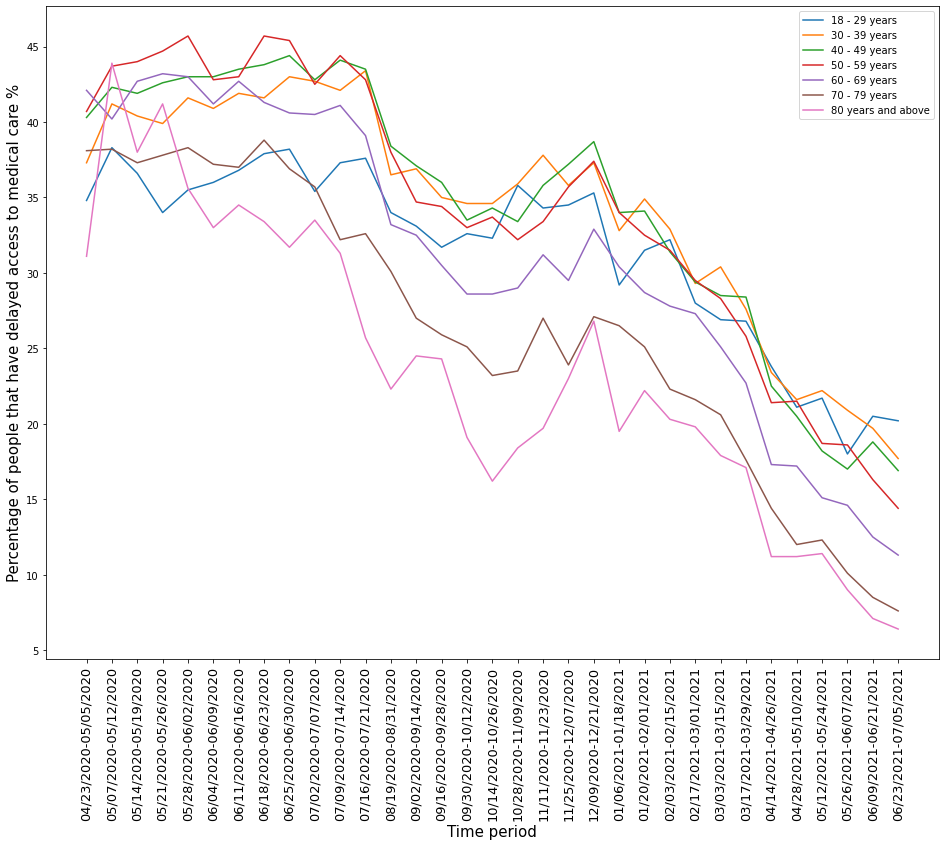

In [513]:
plt.figure(figsize=(16,12))
for i in range(0,7):
    sns.lineplot(x=Time_period_dict.values(), y=pivot_Delayed.iloc[i,:], label=pivot_Delayed.iloc[i].name[3])
    plt.legend()
plt.xticks(rotation='vertical', fontsize = 13)
plt.xlabel('Time period', fontsize = 15)
plt.ylabel('Percentage of people that have delayed access to medical care %', fontsize = 15)
plt.show()

In [625]:
state_data_phase = df_access_Delayed_Didnot[(df_access_Delayed_Didnot['Phase_adj']=='1')&
                  (df_access_Delayed_Didnot['Group']=='By State')].groupby('State')['Value'].mean().sort_values(ascending=False)
state_data_phase_1_df = state_data_phase.to_frame()
state_data_phase_1_df.rename(columns={'Value': 'Phase_1 Value'}, inplace=True)
state_data_phase_1_df['Phase_3.1 Value'] = df_access_Delayed_Didnot[(df_access_Delayed_Didnot['Phase_adj']=='3.1')&
                  (df_access_Delayed_Didnot['Group']=='By State')].groupby('State')['Value'].mean()
state_data_phase_1_df['% Change'] = (state_data_phase_1_df['Phase_1 Value']-state_data_phase_1_df['Phase_3.1 Value'])
state_data_phase_1_df.head()

,Phase_1 Value,Phase_3.1 Value,% Change
State,,,
Oregon,49.766667,25.916667,23.850000
Alaska,49.533333,22.850000,26.683333
Maine,49.000000,18.883333,30.116667
Washington,48.616667,23.616667,25.000000
New Jersey,48.416667,23.233333,25.183333


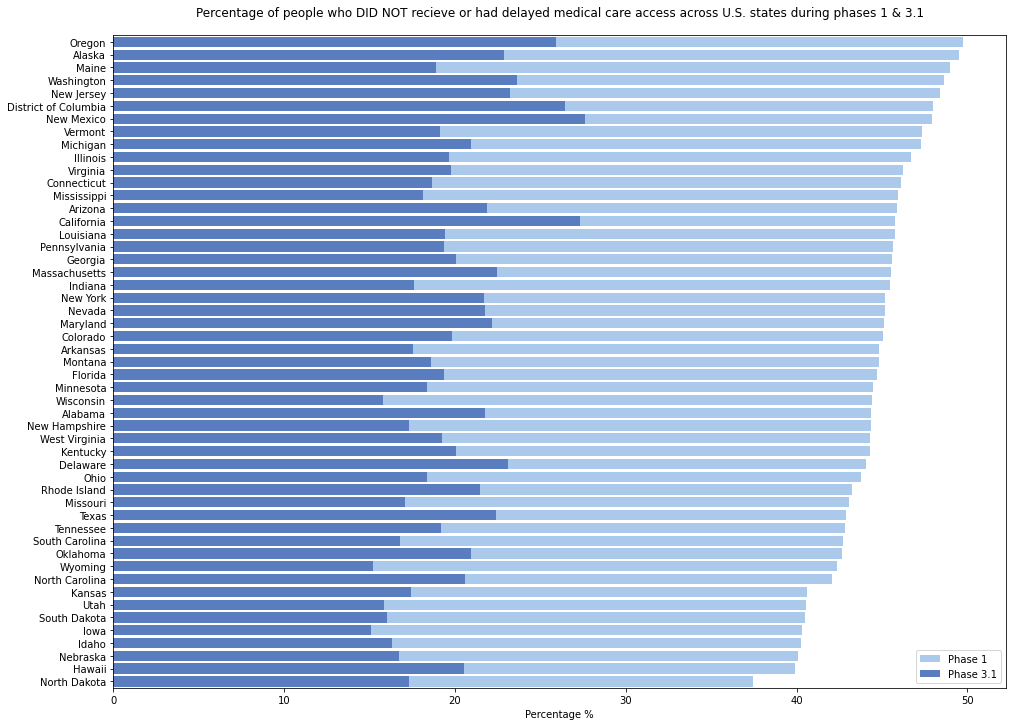

In [627]:
plt.figure(figsize=(16,12))
sns.set_color_codes('pastel')
sns.barplot(y=state_data_phase_1_df.index, x=state_data_phase_1_df['Phase_1 Value'], color='b', label='Phase 1')
sns.set_color_codes('muted')
sns.barplot(y=state_data_phase_1_df.index, x=state_data_phase_1_df['Phase_3.1 Value'], color='b', label='Phase 3.1')
plt.title('Percentage of people who DID NOT recieve or had delayed medical care access across U.S. states during phases 1 & 3.1', y=1.02)
plt.xlabel('Percentage %')
plt.ylabel('')
plt.legend()
plt.show()

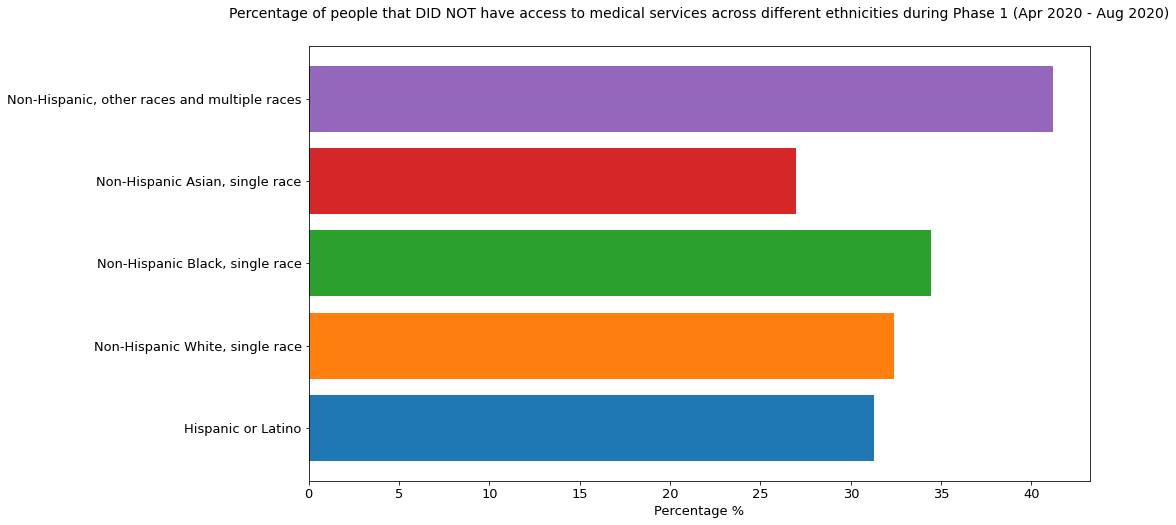

In [623]:
plt.figure(figsize=(14,8))
for sub in Subgroups:
    plt.barh(y=sub, width=df_access_Didnot[df_access_Didnot['Subgroup']==sub].groupby('Phase_adj')['Value'].mean().iloc[0])
plt.yticks(fontsize=13)
plt.xticks(fontsize=13)
plt.xlabel('Percentage %', fontsize=13)
plt.title('Percentage of people that DID NOT have access to medical services across different ethnicities during Phase 1 (Apr 2020 - Aug 2020)', fontsize=14, y=1.05)
plt.show()

In [355]:
minim = 45
for state in States[1:]:
    if np.mean(df_access_Delayed[df_access_Delayed['State']==state]['Value'][:13]) < minim:
        minim = np.mean(df_access_Delayed[df_access_Delayed['State']==state]['Value'][:13])
        state_min = state
maxim = 0
for state in States[1:]:
    if np.mean(df_access_Delayed[df_access_Delayed['State']==state]['Value'][:13]) > maxim:
        maxim = np.mean(df_access_Delayed[df_access_Delayed['State']==state]['Value'][:13])
        state_max = state

print('State with lowest percentage of delayed medical care access between Apr 2020 and Aug 2020: ', state_min)
print('State with highest percentage of delayed medical care access between Apr 2020 and Aug 2020: ', state_max)

State with lowest percentage of delayed medical care access between Apr 2020 and Aug 2020:  North Dakota
State with highest percentage of delayed medical care access between Apr 2020 and Aug 2020:  Oregon


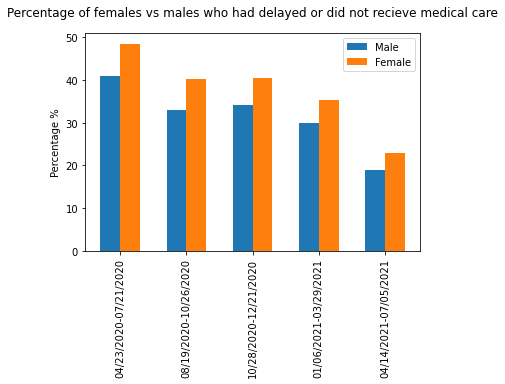

In [621]:
x = np.arange(0,5)
y_1 = df_access_Delayed_Didnot[df_access_Delayed_Didnot['Subgroup']=='Male'].groupby('Phase_adj')['Value'].mean()
y_2 = df_access_Delayed_Didnot[df_access_Delayed_Didnot['Subgroup']=='Female'].groupby('Phase_adj')['Value'].mean()
plt.bar(x-0.15, height=y_1, width=0.3, label='Male')
plt.bar(x+0.15, height=y_2, width=0.3, label='Female')
plt.xticks(x, phase_dict.values(), rotation='vertical')
plt.title('Percentage of females vs males who had delayed or did not recieve medical care', y=1.05)
plt.ylabel('Percentage %')
plt.legend()
plt.show()